# 9/17/2024 Lecture: Using AI for Coding

## In this class we will learn how to leverage AI (ChatGPT) to make coding tasks more efficient/easier. To demonstrate, we will build upon the exercises introduced in Lab 2.

### You can use any AI platform you want! I will be using ChatGPT primarily.

### Dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. More info on the dataset can be found here: https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data


### Goals of today's class:

* Overview of how AI tools, like ChatGPT, can assist in coding tasks.

* Focus on how AI can streamline data exploration, manipulation, and visualization.

# Preparation: Loading the Data

In [ ]:
## import packages
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## mount Google Drive
drive.mount('/content/drive/')

NameError: name 'drive' is not defined

In [ ]:
## read in csv using pandas
diabetes = pd.read_csv('/content/drive/MyDrive/Python Levels/diabetes.csv')

# Beginner Level Exercises: AI Assisted



## Exercise 1

We can use AI for more streamlined and detailed ways to describe the data.

* This could include adding more metrics such as median, range, and standard deviation so that we better understand the spread of each variable in the data!

Sample prompt:
"Given the following dataset, provide code to summarize key metrics like range, standard deviation, min, max and quartiles"


In [ ]:
# Use ChatGPT to generate code for additional summaries
# ChatGPT will suggest a function (or write a function) that best accomplishes the task

diabetes.describe(include='all')  # This gives a more comprehensive overview including count, mean, std, min, and max values.

# In this case, it decided the "describe" function would work best.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


If there is a metric you don't understand, you can ask about it!

  * For example, try asking: what does "count" mean?

  * You can also ask about the "describe" function to find out how it works

## Exercise 2

In the last class, we wrote code to identify missing data and replace it with the median value. Now, we can ask AI to identify alternate methods to replace missing data!

* Sample prompt: "What are some advanced methods for handling missing data besides median imputation?"

AI will probably tell you to perform some type of imputation. Let's pick kNN imputation for demonstration purposes, but feel free to select/try another method!

* Sample prompt: "Provide Python code to impute missing values using kNN imputation in only the following variables: Glucose, BloodPressure, SkinThickness, Insulin, and BMI. Missing values are currently denoted by zero in the diabetes dataframe. Save the imputed dataframe as a new dataframe"
  * It's important to specify what variables we are looking to impute, and what denotes a missing variable. In this case, it's denoted as `0`, NOT `NA`
  * Be specific with your task!

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np

# Variables to impute
variables = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeroes with NaN to indicate missing values
diabetes[variables] = diabetes[variables].replace(0, np.nan)

# Initialize KNNImputer with the desired number of neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Perform kNN imputation
diabetes_imputed = diabetes.copy()
diabetes_imputed[variables] = knn_imputer.fit_transform(diabetes[variables])

Again, if you want to understand what we just did here in more detail, you can follow up by asking ChatGPT something like: "What is kNN imputation doing in the above code?" and it will give you a step-by-step breakdown of the code. Give it a try! 😀

## Exercise 3

We can ask AI to create histogram plots of all the imputed variables side-by-side with the original variables to determine just how much the imputation changed the distribution of values in each variable.

  * Sample prompt: "Write Python code that creates histograms of Glucose, BloodPressure, SkinThickness, Insulin, and BMI in both diabetes and diabetes_imputed side-by-side to visualize how much imputation changed the distribution of values in each specified variable"

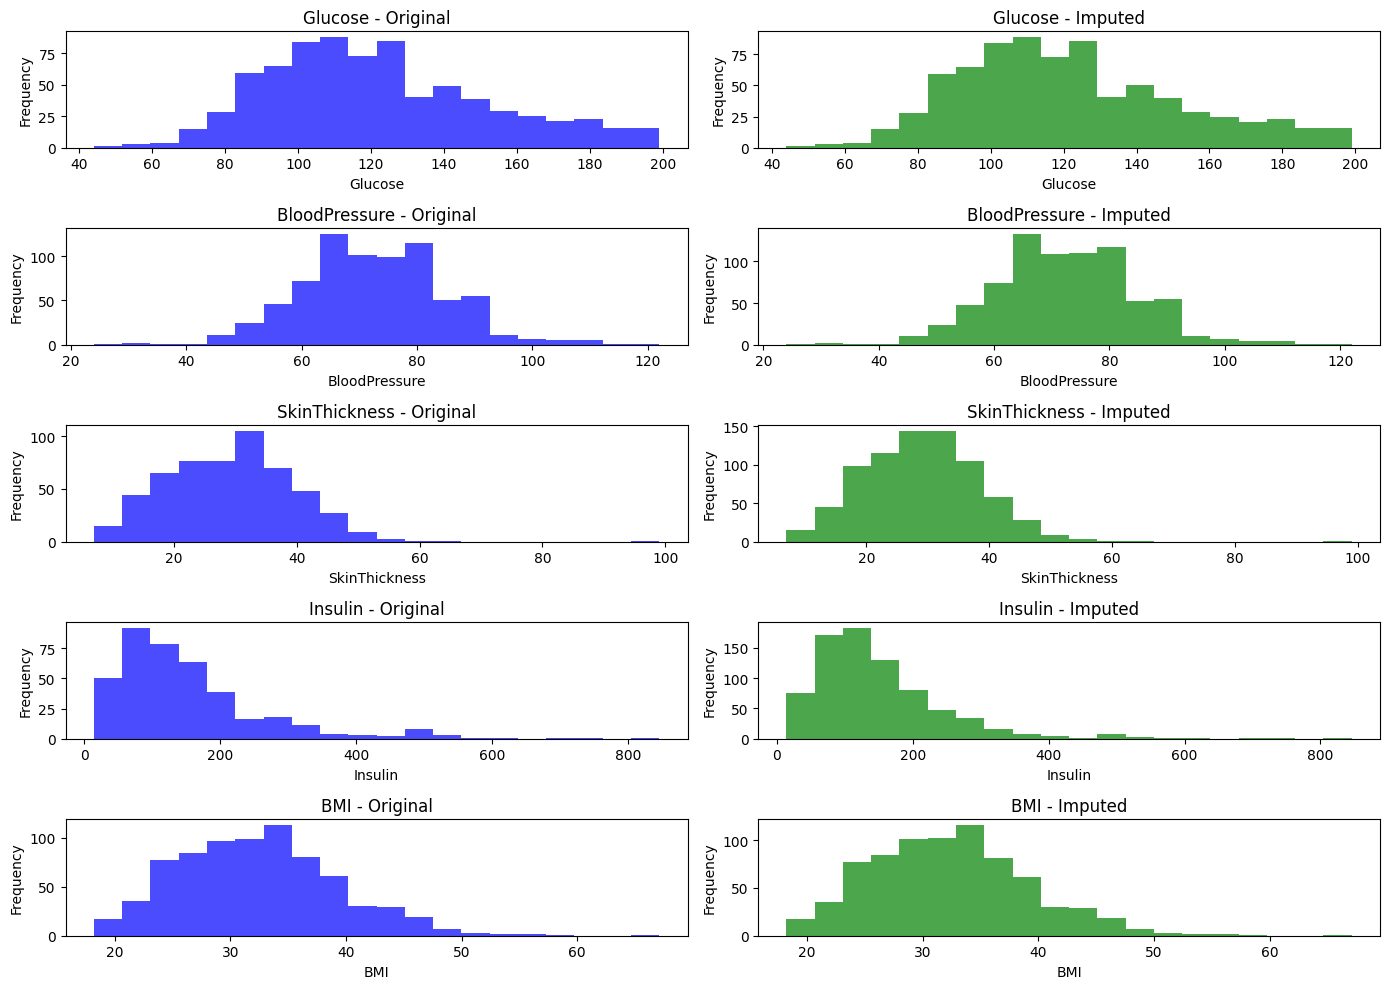

In [ ]:
# This is the code ChatGPT gave me with the above prompt

import matplotlib.pyplot as plt

# Variables to plot
variables = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=2, figsize=(14, 10))

# Plot histograms for each variable in both datasets
for i, var in enumerate(variables):
    # Plot original dataset histogram
    axes[i, 0].hist(diabetes[var].dropna(), bins=20, color='blue', alpha=0.7)
    axes[i, 0].set_title(f'{var} - Original')
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel('Frequency')

    # Plot imputed dataset histogram
    axes[i, 1].hist(diabetes_imputed[var].dropna(), bins=20, color='green', alpha=0.7)
    axes[i, 1].set_title(f'{var} - Imputed')
    axes[i, 1].set_xlabel(var)
    axes[i, 1].set_ylabel('Frequency')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

You could ask ChatGPT to color each variable differently, or leave it as is (original and imputed having their own color) depending on your preference, and it should update the code.

If you are interested in how drastically the values of each variable changed following imputation, you could ask ChatGPT the following question:
  * How can I determine how much imputation changed the values in my dataset for the variables Glucose, BloodPressure, SkinThickness, Insulin, and BMI?

When I asked, it gave me three options:
  1. Compare statistics before and after imputation (we compared the medians last time, but we could compare the means, too)
  2. Visualize changes using side-by-side boxplots (we did this last time)
  3. Additional analysis with difference calculation (calculate the difference between the means of the imputed and original values)

It also gave me some Python code to perform each suggestion. For example, here is the code it provided to execute the third option:


In [ ]:
# Calculate and print differences in mean values with more decimal places
mean_before = diabetes[variables].mean()
mean_after = diabetes_imputed[variables].mean()

differences = mean_after - mean_before

# Round to more decimal places (e.g., 4 decimal places)
differences_rounded = differences.round(4)
print("Differences in Mean Values (Imputed - Original):")
print(differences_rounded)

Differences in Mean Values (Imputed - Original):
Glucose          0.0619
BloodPressure   -0.0562
SkinThickness   -0.2662
Insulin         -5.2266
BMI             -0.0044
dtype: float64


The imputation process slightly increased the mean value of Glucose and decreased the means of BloodPressure, SkinThickness, and BMI. Insulin saw a higher decrease in its mean value, suggesting more substantial changes in its distribution.

Finally, in the last lab, we used boxplots to assess what variables appear to have the largest effect on the outcome. However, boxplots aren't the only way to assess this, and we can leverage AI to discover different types of answering this question.

  * Sample prompt: "Other than boxplots, are there any other types of plots or analyses that will help us understand which variables in the diabetes dataset that could have the largest effect on the outcome prior to performing any modeling?"

ChatGPT gave me a couple of interesting options:
  1. Violin plots can be used to compare the distribution of Glucose, BMI, and Age across different Outcome groups. They combine aspects of boxplots and density plots to show more detail in the distribution.

  2. Density plots can be used to visualize the distribution of Glucose, BMI, and Age, separated by Outcome. This can give a better understanding of how each variable is distributed across the different Outcome groups.

I then asked for code to generate these plots for the aforementioned variables that includes a legend!

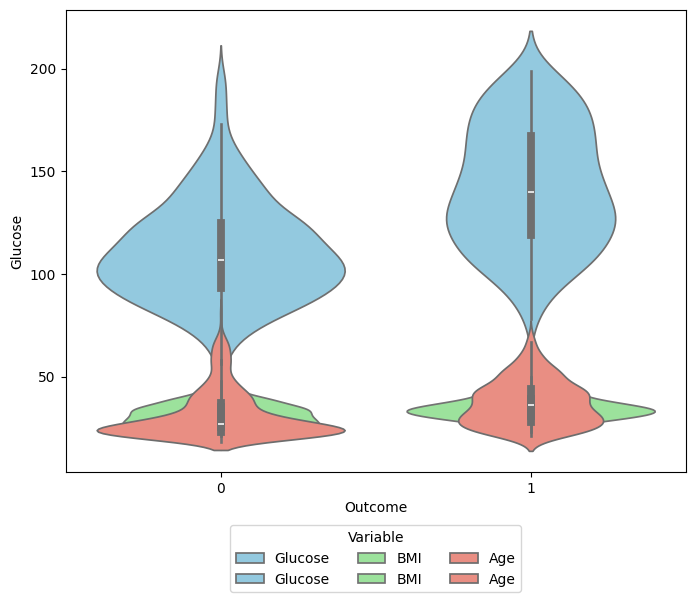

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the plot
plt.figure(figsize=(8, 6))

# Plot each variable with a different color
sns.violinplot(x='Outcome', y='Glucose', data=diabetes, color='skyblue', label='Glucose')
sns.violinplot(x='Outcome', y='BMI', data=diabetes, color='lightgreen', label='BMI')
sns.violinplot(x='Outcome', y='Age', data=diabetes, color='salmon', label='Age')

# Add legend at the bottom
plt.legend(title='Variable', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Show plot
plt.show()


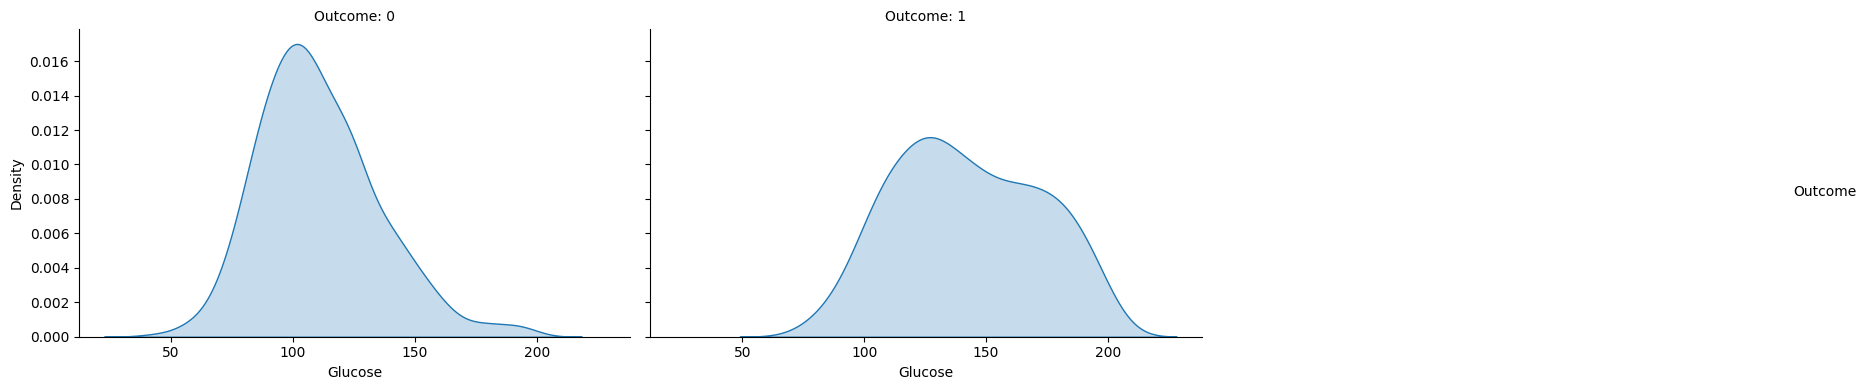

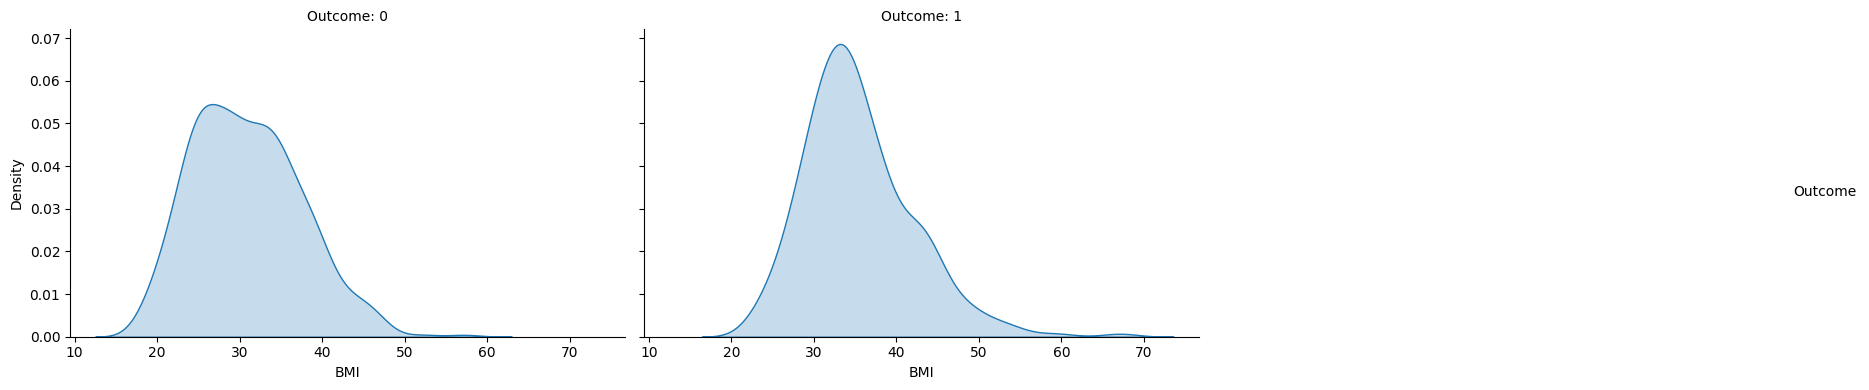

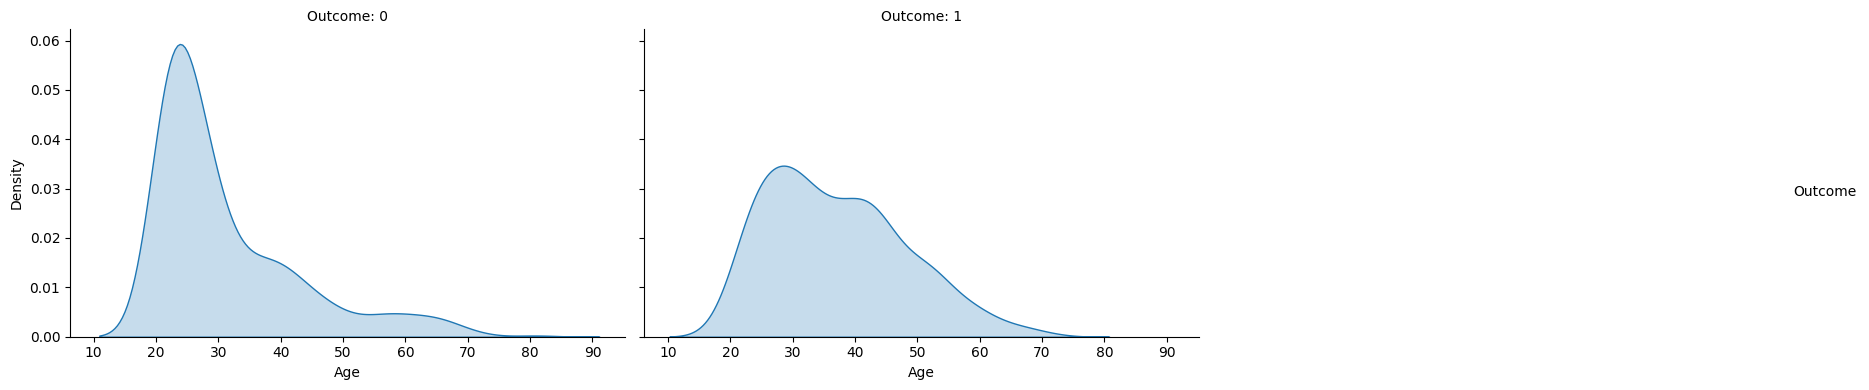

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid to combine the density plots
g = sns.FacetGrid(diabetes, col='Outcome', col_wrap=3, height=4, aspect=1.5)

# Map the KDE plots to each subplot
g.map(sns.kdeplot, 'Glucose', fill=True)
g.set_axis_labels('Glucose', 'Density')
g.set_titles('Outcome: {col_name}')
g.add_legend(title='Outcome')

plt.show()

# Repeat for BMI
g = sns.FacetGrid(diabetes, col='Outcome', col_wrap=3, height=4, aspect=1.5)
g.map(sns.kdeplot, 'BMI', fill=True)
g.set_axis_labels('BMI', 'Density')
g.set_titles('Outcome: {col_name}')
g.add_legend(title='Outcome')

plt.show()

# Repeat for Age
g = sns.FacetGrid(diabetes, col='Outcome', col_wrap=3, height=4, aspect=1.5)
g.map(sns.kdeplot, 'Age', fill=True)
g.set_axis_labels('Age', 'Density')
g.set_titles('Outcome: {col_name}')
g.add_legend(title='Outcome')

plt.show()


These plots suggest that Glucose has the most noticeable difference between the outcome groups. We could also note that the people who have outcome 0 (no diabetes) tend to be younger, and there aren't tremendously different BMI distributions among the two groups. Therefore, we can infer that glucose seems to be the most predictive.

# Intermediate Level Exercises: AI Assisted


## Exercise 1

In the last lab, we explored ways to clean and preprocess the data by replacing missing values with the median, finding/removing outliers, and feature engineering by creating categorical variables from the continous BMI and Age variables we were originally given.

We previously learned about kNN imputation, but we blindly used "5" as the number of neighbors. Generally:
  * Smaller k Values are more sensitive to noise in the data and can lead to overfitting.
  * Larger k Values are ,ore stable and less sensitive to noise but can smooth over important details in the data and lead to underfitting.

Now, we can explore more nuanced imputation methods to replace missing data using AI. We can ask ChatGPT: "How do we select the best value of k for kNN imputation?"

The general answers I got were:
  1. Cross validation (select the best k by evaluating model performance on different values of k)
  2. Grid searching with cross validation (automates the process of selecting the best k by performing an exhaustive search over a specified parameter grid.)

Let's try option #1. We can ask AI to modify the code from before to include cross validation.
  * Sample prompt: "Modify this code to perform cross validation to select the best k"

```
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np

# Variables to impute
variables = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeroes with NaN to indicate missing values
diabetes[variables] = diabetes[variables].replace(0, np.nan)

# Initialize KNNImputer with the desired number of neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Perform kNN imputation
diabetes_imputed = diabetes.copy()
diabetes_imputed[variables] = knn_imputer.fit_transform(diabetes[variables])
```

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression  # Or any model you want to use for evaluation

diabetes = pd.read_csv('/content/drive/MyDrive/Python Levels/diabetes.csv')

# Variables to impute
variables = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeroes with NaN to indicate missing values
diabetes[variables] = diabetes[variables].replace(0, np.nan)

# Range of k values to try
k_values = range(1, 11)  # Try k from 1 to 10

# Store results
cv_scores = []

# Perform cross-validation for each k
for k in k_values:
    imputer = KNNImputer(n_neighbors=k)
    imputed_data = diabetes.copy()
    imputed_data[variables] = imputer.fit_transform(imputed_data[variables])

    # Choose a model for evaluation (here, Logistic Regression)
    model = LogisticRegression(max_iter=1000)

    # Perform cross-validation (e.g., 5-fold)
    scores = cross_val_score(model, imputed_data[variables], diabetes['Outcome'], cv=5)
    cv_scores.append(scores.mean())

# Find the best k
optimal_k = k_values[np.argmax(cv_scores)]
print("Optimal k:", optimal_k)

# Perform imputation with the optimal k
best_imputer = KNNImputer(n_neighbors=optimal_k)
diabetes_imputed = diabetes.copy()
diabetes_imputed[variables] = best_imputer.fit_transform(diabetes_imputed[variables])

Optimal k: 9


AI can also streamline the outlier removal process.
  * Sample prompt: "How can I automate outlier removal for all variables in my "diabetes" dataset?"

The results (for that prompt) are:
  1. Z-score method: great for normally-distributed data
  2. IQR method (we did this last time): preferable for skewed data, as it is more robust to non-normal distributions

  AI can provide alternative options that could better suit your data! Just make sure you understand the assumptions of each method thoroughly before making a choice.

Since our histograms indicate skewness in certain variables, this reassures us that the IQR method is an appropriate choice to remove outliers.

Prompt for below code: "Write a function that removes outliers from diabetes_imputed using the IQR method and print the observations that were removed in a separate dataframe"

In [ ]:
# prompt: "Write a function that removes outliers from diabetes_imputed using the IQR method and print the observations that were removed in a separate dataframe"

def remove_outliers_iqr(df, columns):
  """
  Removes outliers from the specified columns of a DataFrame using the IQR method.

  Args:
    df: The pandas DataFrame.
    columns: A list of column names to remove outliers from.

  Returns:
    A new DataFrame with outliers removed, and a DataFrame of the removed observations.
  """
  df_cleaned = df.copy()
  removed_rows = pd.DataFrame()
  for col in columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    removed_rows = pd.concat([removed_rows, outliers])
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
  return df_cleaned, removed_rows

# Remove outliers from all columns of diabetes_imputed
diabetes_cleaned, removed_obs = remove_outliers_iqr(diabetes_imputed, diabetes_imputed.columns)

# Print the removed observations
removed_obs


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136.0,70.0,32.000000,110.000000,37.100000,0.153,43,1
159,17,163.0,72.0,41.000000,114.000000,40.900000,0.817,47,1
298,14,100.0,78.0,25.000000,184.000000,36.600000,0.412,46,1
455,14,175.0,62.0,30.000000,233.777778,33.600000,0.212,38,1
18,1,103.0,30.0,38.000000,83.000000,43.300000,0.183,33,0
...,...,...,...,...,...,...,...,...,...
552,6,114.0,88.0,21.666667,121.222222,27.800000,0.247,66,0
666,4,145.0,82.0,18.000000,191.777778,32.500000,0.235,70,1
674,8,91.0,82.0,33.444444,77.555556,35.600000,0.587,68,0
684,5,136.0,82.0,34.333333,186.777778,37.522222,0.640,69,0


Since our data has varibles that are on varying scales, we can also ask AI to update our code to standardize our variables. Without standardization, variables with larger scales (e.g. insulin) might dominate those with smaller scales (BMI)

In [ ]:
# prompt: Write code that standardizes the variables in diabetes_cleaned and save it as a new dataframe

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the numerical columns to standardize (excluding 'Outcome')
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Fit the scaler to the selected columns and transform the data
diabetes_standardized = diabetes_cleaned.copy()
diabetes_standardized[numerical_cols] = scaler.fit_transform(diabetes_cleaned[numerical_cols])


## Exercise 2

Last lab we performed EDA that segments the data by key demographic variables (age and BMI) to uncover hidden patterns, relationships, and potential risk factors associated with diabetes. Now, we will use AI to help us explore interactions between variables in a streamlined way.


Interaction terms allow us to explore how the relationship between one variable and the outcome might change depending on the level of another variable. For example, how glucose levels affect diabetes risk might depend on a person's BMI.

AI (like ChatGPT) can be used to generate and refine code that explores these interactions efficiently. Here are some ideas:

  - **Identify Key Interactions**: Ask ChatGPT to suggest interesting variable interactions based on your analysis goals (e.g., Glucose, BMI, Age, and Outcome).

- **Generate Interaction Plots**: Use ChatGPT to create visualizations like `sns.lmplot()` or `sns.catplot()` to explore how pairs of variables interact with the Outcome.

- **Create Interaction Features**: Ask ChatGPT for guidance on creating new features that represent interactions between variables (e.g., `Glucose * BMI`).

- **Run Statistical Tests**: Use ChatGPT to perform statistical tests (e.g., ANOVA or regression with interaction terms) to assess the significance of interactions.

- **Model with Interaction Terms**: Seek help from ChatGPT to include interaction terms in predictive models (e.g., logistic regression) and interpret their effects.

Take the time to explore some of these prompts and ideas!

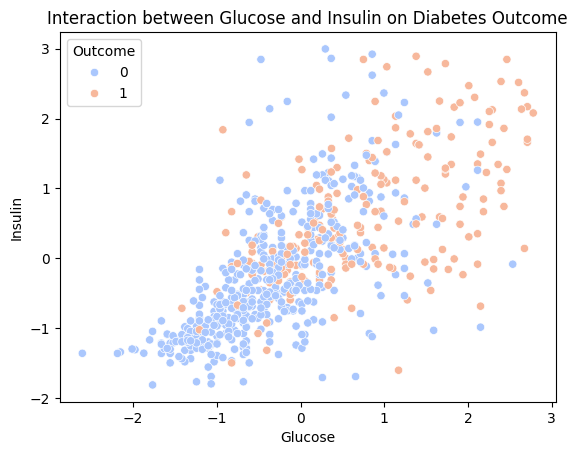

In [ ]:
# Example: Insulin × Glucose: Examine the interaction between insulin levels and glucose levels to see how they jointly affect diabetes risk.

# Prompt: Explore the interaction between insulin levels and glucose levels to see how they jointly affect diabetes risk.

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=diabetes_standardized, palette='coolwarm')
plt.title('Interaction between Glucose and Insulin on Diabetes Outcome')
plt.show()

AI can also assist in creating statistical tests that can provide further insights into the significance of these interactions.


In [ ]:
# prompt: Statistical test to test significance of glucose and insulin interaction effect in diabetes_cleaned

import statsmodels.formula.api as sm

# Fit a logistic regression model with an interaction term
model = sm.logit("Outcome ~ Glucose * Insulin", data=diabetes_standardized).fit()

# Print the model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.487429
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  665
Model:                          Logit   Df Residuals:                      661
Method:                           MLE   Df Model:                            3
Date:                Tue, 27 Aug 2024   Pseudo R-squ.:                  0.2199
Time:                        13:49:24   Log-Likelihood:                -324.14
converged:                       True   LL-Null:                       -415.50
Covariance Type:            nonrobust   LLR p-value:                 2.281e-39
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.9346      0.108     -8.641      0.000      -1.147      -0.723
Glucose       

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load your dataset
# diabetes_cleaned = pd.read_csv('path_to_your_dataset.csv')

# Define your model with interaction terms
# Use the formula API to include main effects and interaction terms
formula = 'Outcome ~ (Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age)**2'

# Fit the model
model = smf.ols(formula, data=diabetes_standardized).fit()

# Print the summary to view coefficients and p-values
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     10.01
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           7.00e-42
Time:                        13:49:25   Log-Likelihood:                -284.18
No. Observations:                 665   AIC:                             642.4
Df Residuals:                     628   BIC:                             808.9
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

## Exercise 3

Last class, we worked on creating heatmaps and pair plots to visualize correlations between variables in our dataset. Now, we can use AI to update the code to include additional features such as:
* p-values to highlight strong correlations more clearly
* pair plots annotated with correlation coefficients

You can ask AI to modify your code chunk according to the information you would like to add, or even ask it to suggest informative modifications.

NOTE: The correlation matrix for a dataset should be the same before and after standardization. Changes from the last lecture are likely due to the use of imputation to handle missing values rather than replacing all missing values with the median

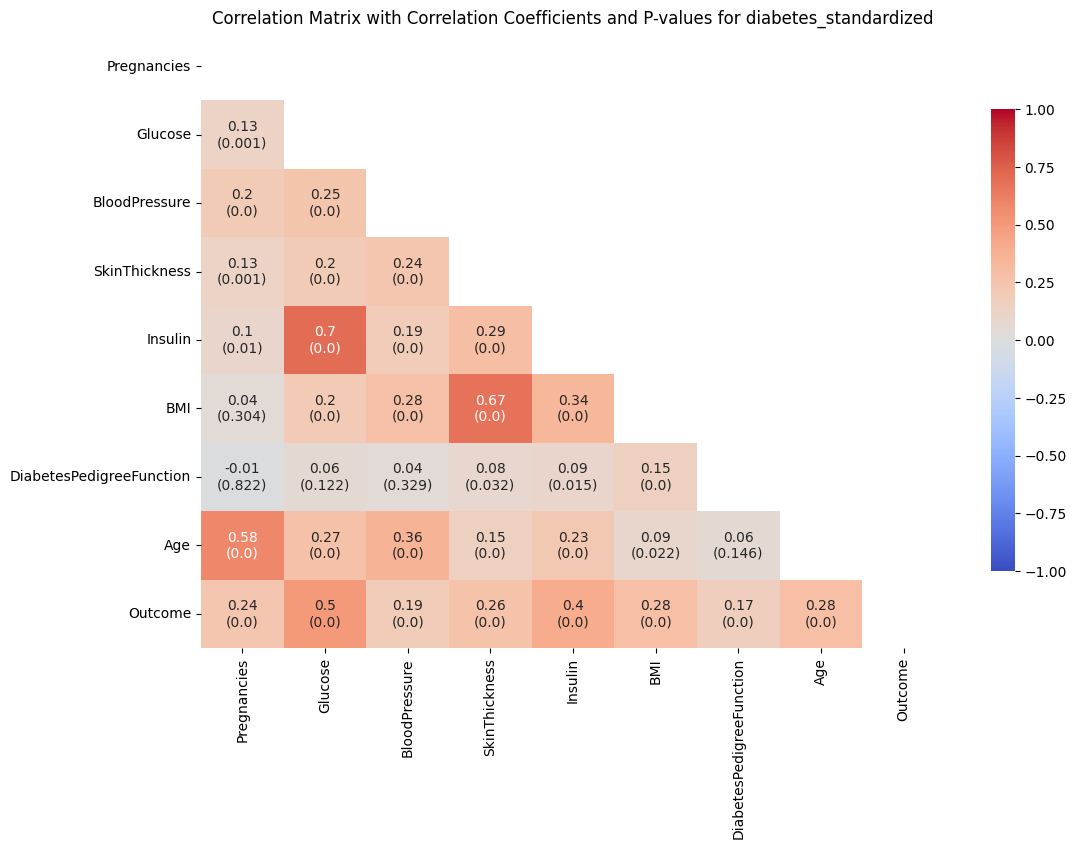

In [ ]:
# Prompt: Write code to create a correlation heat map annotated with p-values for the dataframe diabetes_standardized
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr  # Import pearsonr function

# Compute correlation matrix with p-values
def correlation_with_pvalues(df):
    df = df.dropna()
    rho = df.corr()
    pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
    return rho, pval

# Calculate correlation matrix and p-values
correlation_matrix, p_values = correlation_with_pvalues(diabetes_standardized)

# Create annotations for the heatmap with correlation coefficients and p-values
annotations = correlation_matrix.round(2).astype(str) + "\n(" + p_values.round(3).astype(str) + ")"

# Plot figure
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=annotations, fmt="", cmap='coolwarm', vmin=-1, vmax=1,
            mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)),
            cbar_kws={"shrink": 0.75})
plt.title('Correlation Matrix with Correlation Coefficients and P-values for diabetes_standardized')
plt.show()


# Advanced-Level Exercises: AI Assisted


For this exercise, we will be working with the breast cancer dataset (cancerdata.csv). This will be slightly different from the last exercise, since we will now be focused on how to improve our ML models with the use of AI rather than going step-by-step in each exercise.

Last time, we used logistic regression and random forest models. Today, we will use both RF and XGBoost models and learn how to tune hyperparameters to hopefully improve our predictive ability. We will also use AI to help create more informative plots that can assess each variable's contributions more in-depth.

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

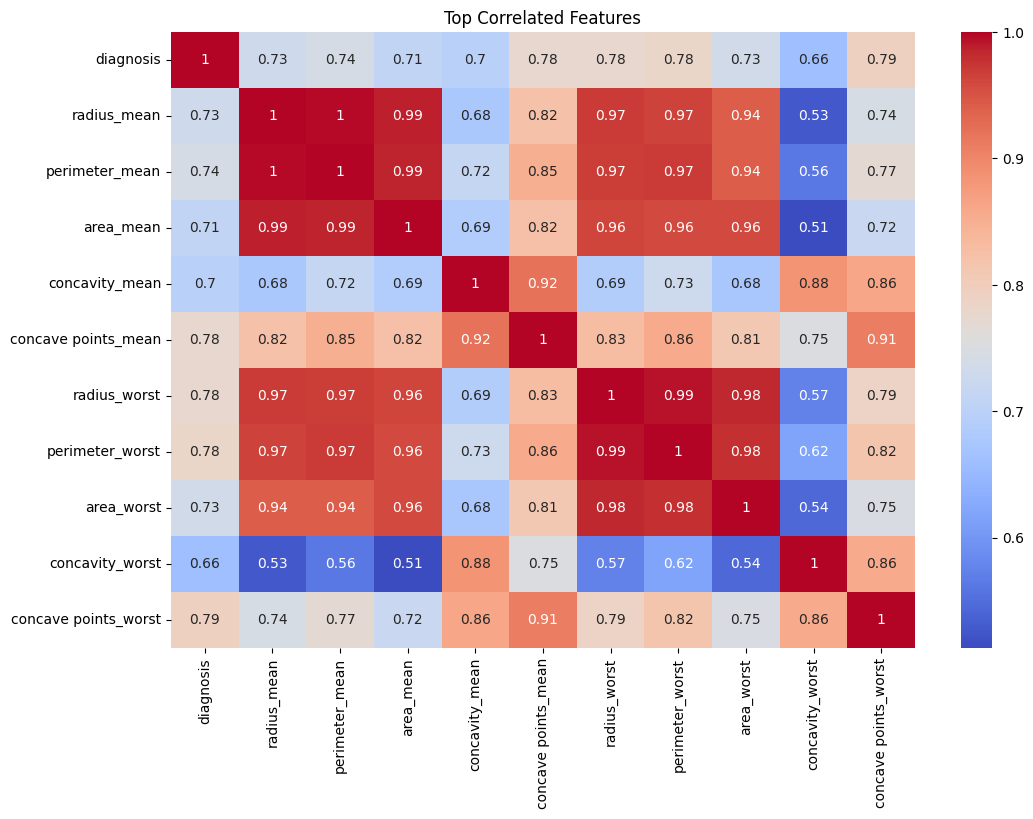

In [ ]:
# Code from last lecture- run this to start

##import necessary packages and mount drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

data = pd.read_csv('/content/drive/MyDrive/Python Levels/cancerdata.csv')

##look at the first few rows of the dataset
print(data.head())

##remove last column -- full of NA's
data = data.drop(columns=['Unnamed: 32'])

##remove missing values (if any)
data = data.dropna()

##convert categorical columns to numerical -- Malignat = 1, Benign = 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

## select the top features with the highest correlations
corr_matrix = data.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["diagnosis"]) > 0.6]
plt.figure(figsize=(12, 8))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Features')
plt.show()

## reduce the dataset to the selected features
selected_features = top_corr_features.drop(['diagnosis'])
X_selected = data[selected_features]

## split the selected data into training and testing sets
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

## scale the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We can ask AI to modify the code from the last lecture to include hyperparameter tuning. The hope is that we will tune hyperparameters of the Random Forest model to find the combination that gives the best accuracy on the training data. Hopefully, the test data isn't too different from the training data, and our prediction accuracy will improve on the test set!

Prompt: "Modify the code below to tune hyperparameters"
```
### Random Forest Model ###
## fit a random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

## predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

## evaluate the random forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest - Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest - Classification Report:\n", class_report_rf)


## visualize the confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')

plt.show()
```

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Random Forest:
 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Random Forest - Confusion Matrix:
 [[69  2]
 [ 3 40]]

Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



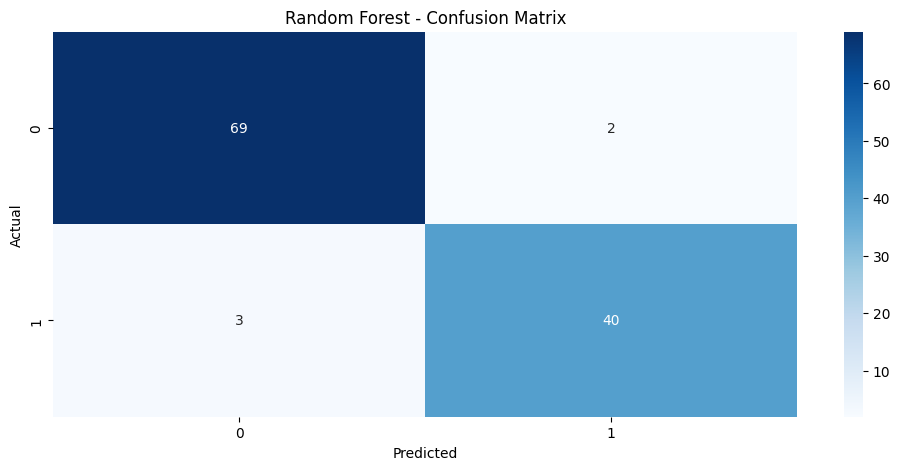

In [ ]:
# Resulting code
# Takes a while to run

from sklearn.model_selection import GridSearchCV

### Random Forest Model with Hyperparameter Tuning ###
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best model
best_rf_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the best Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Best Parameters for Random Forest:\n", grid_search.best_params_)
print("\nRandom Forest - Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest - Classification Report:\n", class_report_rf)

# Visualize the confusion matrices
plt.figure(figsize=(12, 5))

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')

plt.show()

## Key Changes:
# Parameter Grid (param_grid): This defines the hyperparameters you want to tune and the values to try.
# GridSearchCV: This performs an exhaustive search over the specified hyperparameter values using cross-validation.
# Best Model Selection: After tuning, the best model is selected based on cross-validation performance.
# Prediction and Evaluation: Predictions are made using the best model, and evaluation metrics are printed and visualized.

# If it's taking too long to run, you can ask AI to shrink the parameter grid

We can also ask AI to make some adjustments to make the feature importance plot for random forest slightly more informative. For example, we can ask AI to modify the code to show Relative Importance, which normalizes the feature importance scores so that they add up to 1 (or 100%) to show relative importance. This helps in understanding the proportionate contribution of each feature.

Prompt: Modify the code below to show relative importance (normalized feature importance scores)

```
### Random Forest Model ###
## analyze the random forest feature importances
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=selected_features, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Random Forest - Feature Importances:\n", feature_importances)

## visualize the random forest feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index)
plt.title('Random Forest - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
```

Another powerful ML tool is XGBoost. XGBoost differs from Random Forest in that it uses gradient boosting, which builds trees sequentially by correcting the errors of the previous ones, potentially leading to better performance through more accurate and efficient learning.

We can ask AI to build an XGBoost model for the same task and tune the hyperparameters.

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for XGBoost:
 {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}

XGBoost - Confusion Matrix:
 [[69  2]
 [ 5 38]]

XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



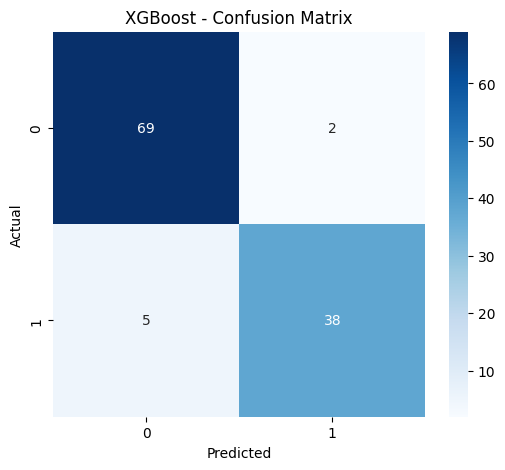

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
# prompt: Write code for an XGBoost model using X_train, X_test, y_train, y_test and predict on the test set. Make sure to tune hyper parameters during model training. Predict on the test set and create a confusion matrix.

import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best model
best_xgb_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

# Evaluate the best XGBoost model
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print("Best Parameters for XGBoost:\n", grid_search.best_params_)
print("\nXGBoost - Confusion Matrix:\n", conf_matrix_xgb)
print("\nXGBoost - Classification Report:\n", class_report_xgb)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost - Confusion Matrix')
plt.show()

# Visualize the classification report
print(class_report_xgb)

Another useful (and cool) feature of XGBoost is SHAP values. SHAP values measure the impact of each feature on a specific prediction by comparing it to a baseline, considering all possible interactions between features, whereas variable importance only assesses the overall effect of each feature on the model’s predictions, without accounting for these interactions.

Prompt: "Write code to calculate and plot SHAP values, including negative and positive contributions for each feature. Include and describe the features you include to make the plot more informative"

Resulting explanation:

  * `shap.summary_plot()`:
    * Title: Indicates that the plot is showing feature importance using SHAP values.
    * plot_type="bar": This type of plot displays the mean absolute SHAP values for each feature, making it easy to see which features have the most impact on predictions.
    * X-axis: Represents the mean absolute SHAP value, which shows how much each feature contributes to predictions on average.
    * Y-axis: Lists the features, ordered by their mean absolute SHAP values, so the most important features appear at the top.

You may have to run this code first in bash to install shap

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.7 MB/s eta 0:00:00


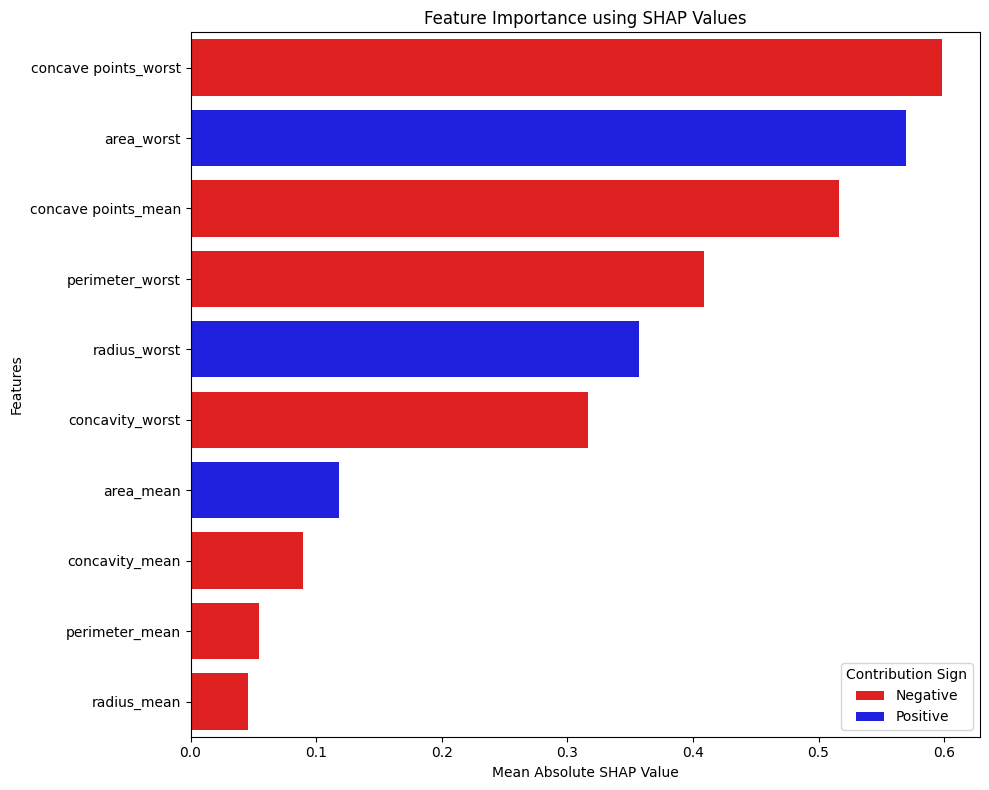

In [ ]:
import pandas as pd
import shap
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and plot SHAP values
explainer = shap.Explainer(best_xgb_model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Create a DataFrame with mean SHAP values for each feature
shap_df = pd.DataFrame({
    'Feature': X_train.columns,  # Use original feature names
    'Mean SHAP Value': np.abs(shap_values.values).mean(axis=0),
    'Mean SHAP Contribution': shap_values.values.mean(axis=0)
})

# Sort by absolute SHAP values
shap_df = shap_df.sort_values(by='Mean SHAP Value', ascending=False)

# Assign a hue category based on positive/negative SHAP contributions
shap_df['Contribution Sign'] = shap_df['Mean SHAP Contribution'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Mean SHAP Value', y='Feature', data=shap_df, hue='Contribution Sign',
            palette={'Positive': 'blue', 'Negative': 'red'}, dodge=False)

# Add title and labels
plt.title('Feature Importance using SHAP Values')
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Features')
plt.tight_layout()
plt.legend(title='Contribution Sign', loc='lower right')
plt.show()



1. **Feature Importance**:
   - The features are ranked based on their influence on the model's prediction of whether the diagnosis is 0 or 1.
   - Higher-ranked features (like `concave points_worst`, `area_worst`, etc.) have a greater impact on the model's ability to distinguish between diagnosis outcomes.

2. **Positive vs. Negative Contributions**:
   - **Red Bars**: These indicate that higher values of the feature are associated with a **decreased likelihood of a positive diagnosis (1)**. For example, a higher value in `concave points_worst` tends to reduce the probability that the model will predict a diagnosis of 1.
   - **Blue Bars**: These indicate that higher values of the feature are associated with an **increased likelihood of a positive diagnosis (1)**. For instance, higher `area_worst` values tend to increase the probability that the model will predict a diagnosis of 1.

3. **Interpretation of Key Features**:
   - `concave points_worst` is the most influential feature, and its negative SHAP value suggests that higher values of this feature decrease the likelihood of a positive diagnosis (1).
   - Conversely, `area_worst` has a significant positive impact, meaning that higher values increase the likelihood of a positive diagnosis (1).

4. **Magnitude of Impact**:
   - The length of each bar reflects how strongly the feature influences the prediction. A longer bar, like that of `concave points_worst`, indicates a strong influence in decreasing the predicted probability of a positive diagnosis, whereas a feature like `area_worst` strongly increases this probability.

# Closing Remarks on AI

AI can be a very powerful tool to improve your code, suggest ideas for improvement, and streamline processes. However, it's very important to take the time to understand what exactly the AI is doing and what modifications it is making. Be very mindful about ensuring that any assumptions about your data are correct and that you do not blindly rely on AI suggestions! Do your research prior to adapting any code or information from AI sources.